In [1]:
import sys
print(sys.version)

3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]


In [2]:
import tensorflow as tf
#import tensorflow_hub as hub
print(tf.__version__)
#print("version de tensorflow hub ", hub.__version__)


2.10.0


In [3]:
print( "GPU", "Available" if tf.config.list_physical_devices("GPU") else "NEL")

GPU Available


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
#import tensorflow_hub as hub

In [5]:
labels_csv = pd.read_csv("fullmasivo.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                                       id        breed
count                                               20580        20580
unique                                              20580          120
top     images/Images/n02085620-Chihuahua/n02085620_10...  Maltese_dog
freq                                                    1          252
                                                  id      breed
0  images/Images/n02085620-Chihuahua/n02085620_10...  Chihuahua
1  images/Images/n02085620-Chihuahua/n02085620_10...  Chihuahua
2  images/Images/n02085620-Chihuahua/n02085620_10...  Chihuahua
3  images/Images/n02085620-Chihuahua/n02085620_10...  Chihuahua
4  images/Images/n02085620-Chihuahua/n02085620_10...  Chihuahua


In [6]:
labels_csv

id                breed
0      images/Images/n02085620-Chihuahua/n02085620_10...            Chihuahua
1      images/Images/n02085620-Chihuahua/n02085620_10...            Chihuahua
2      images/Images/n02085620-Chihuahua/n02085620_10...            Chihuahua
3      images/Images/n02085620-Chihuahua/n02085620_10...            Chihuahua
4      images/Images/n02085620-Chihuahua/n02085620_10...            Chihuahua
...                                                  ...                  ...
20575  images/Images/n02116738-African_hunting_dog/n0...  African_hunting_dog
20576  images/Images/n02116738-African_hunting_dog/n0...  African_hunting_dog
20577  images/Images/n02116738-African_hunting_dog/n0...  African_hunting_dog
20578  images/Images/n02116738-African_hunting_dog/n0...  African_hunting_dog
20579  images/Images/n02116738-African_hunting_dog/n0...  African_hunting_dog

[20580 rows x 2 columns]

In [7]:
labels_csv = labels_csv.sample(frac=1).reset_index(drop=True)
labels_csv


id  \
0      images/Images/n02099267-flat-coated_retriever/...   
1      images/Images/n02097658-silky_terrier/n0209765...   
2      images/Images/n02100877-Irish_setter/n02100877...   
3      images/Images/n02093754-Border_terrier/n020937...   
4      images/Images/n02113799-standard_poodle/n02113...   
...                                                  ...   
20575  images/Images/n02097474-Tibetan_terrier/n02097...   
20576  images/Images/n02107574-Greater_Swiss_Mountain...   
20577  images/Images/n02101556-clumber/n02101556_1819...   
20578  images/Images/n02099601-golden_retriever/n0209...   
20579  images/Images/n02106382-Bouvier_des_Flandres/n...   

                            breed  
0                            flat  
1                   silky_terrier  
2                    Irish_setter  
3                  Border_terrier  
4                 standard_poodle  
...                           ...  
20575             Tibetan_terrier  
20576  Greater_Swiss_Mountain_dog  
20577                     clumber  
20578            golden_retriever  
20579        Bouvier_des_Flandres  

[20580 rows x 2 columns]

In [8]:
labels_csv["breed"].value_counts().median()

159.5

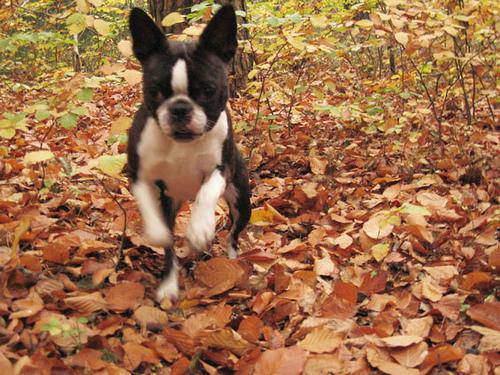

In [9]:
from IPython.display import Image
Image("train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [10]:
# create pathname from image id

filename = [ fname for fname in labels_csv["id"] ]
filename[:19]

['images/Images/n02099267-flat-coated_retriever/n02099267_808.jpg',
 'images/Images/n02097658-silky_terrier/n02097658_4778.jpg',
 'images/Images/n02100877-Irish_setter/n02100877_8900.jpg',
 'images/Images/n02093754-Border_terrier/n02093754_6248.jpg',
 'images/Images/n02113799-standard_poodle/n02113799_1183.jpg',
 'images/Images/n02106166-Border_collie/n02106166_7447.jpg',
 'images/Images/n02096294-Australian_terrier/n02096294_5176.jpg',
 'images/Images/n02098413-Lhasa/n02098413_7441.jpg',
 'images/Images/n02097298-Scotch_terrier/n02097298_9293.jpg',
 'images/Images/n02107142-Doberman/n02107142_4663.jpg',
 'images/Images/n02092339-Weimaraner/n02092339_2941.jpg',
 'images/Images/n02097130-giant_schnauzer/n02097130_2942.jpg',
 'images/Images/n02115641-dingo/n02115641_504.jpg',
 'images/Images/n02105056-groenendael/n02105056_4469.jpg',
 'images/Images/n02102480-Sussex_spaniel/n02102480_5808.jpg',
 'images/Images/n02098105-soft-coated_wheaten_terrier/n02098105_597.jpg',
 'images/Images/n021

In [11]:
# check whether number of filenames matches number of actual image file
import os
if len(os.listdir("train/")) == len(filename):
  print("file name match")
else:
  print("file name no match")

file name no match


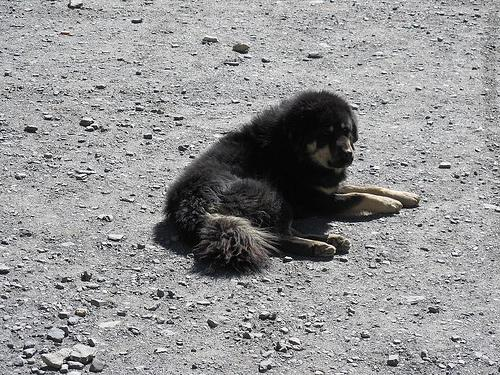

In [12]:
# one more check
Image(filename[9000])

In [13]:
labels = labels_csv["breed"].to_numpy()
#labels = np.array(labels)
labels

array(['flat', 'silky_terrier', 'Irish_setter', ..., 'clumber',
       'golden_retriever', 'Bouvier_des_Flandres'], dtype=object)

In [14]:
len(labels)

20580

In [15]:
dfe = "affenpinscher" in labels_csv['breed'].values
dfe

True

In [16]:
# see if number of labels matches the number of filename
if len(labels) == len(filename):
  print("yes")
else:
  print("no")

yes


In [17]:
# find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
# turn  a single label into an array of boleans
print(labels[0])
labels[0] == unique_breeds

flat


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
# turn every labels into bolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [20]:
len(boolean_labels)

20580

In [21]:
# example: turning bolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in bolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

flat
(array([93], dtype=int64),)
93
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [22]:
# creating our own validation set

# setup x & y variables
x = filename
y = boolean_labels

we're going to start off experiementing with 1000 images and increase as nedded

In [23]:
# set number  of images to use for experimenting
NUM_IMAGES = 1000 # @param {type:"slider", min:1000, max:10000}

In [24]:
# let´s split our data into train and validation sets
from sklearn.model_selection import train_test_split

#x_train, x_val, y_train, y_val = train_test_split( x[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42 )
x_train, x_val, y_train, y_val = train_test_split( x, y, test_size=0.3, random_state=0 ) # all

In [25]:
len(x_train), len(x_val), len(y_train), len(y_val)

(14406, 6174, 14406, 6174)

In [26]:
x_train[:5], y_train[:2]

(['images/Images/n02107312-miniature_pinscher/n02107312_7095.jpg',
  'images/Images/n02090721-Irish_wolfhound/n02090721_3811.jpg',
  'images/Images/n02112350-keeshond/n02112350_7573.jpg',
  'images/Images/n02113624-toy_poodle/n02113624_1756.jpg',
  'images/Images/n02096585-Boston_bull/n02096585_169.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

Prepocessing images (turning images into tensor)

1. take an image filepath as input
2. use tensorflow to read the file and save it to a variable, image
3. turn our image (a jpg) into tensor
4. normalize our image ( convert color channel values from 0-255 to 0-1 )
5. resize the image to be a shape of (244, 244)
6. return the modified image

In [27]:
# convert image to nunpy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(300, 400, 3)

In [28]:
# define image size
IMG_SIZE = 299

# create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into tensor
  """
  # read in an image file
  image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical tensor with 3 colour channels (Red, blue, green)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [29]:
# create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Take a image file path name and associate label,
  procces the image and return a tuple (image, label)
  """
  image = process_image(image_path)
  return image, label


In [30]:
# Demo of above
(process_image(x[42]), y[42])

(<tf.Tensor: shape=(299, 299, 3), dtype=float32, numpy=
 array([[[0.8036049 , 0.73826283, 0.65916914],
         [0.94072485, 0.8819113 , 0.799555  ],
         [0.73074603, 0.6851723 , 0.5995067 ],
         ...,
         [0.59937704, 0.72094566, 0.7013378 ],
         [0.59219617, 0.7137648 , 0.69415694],
         [0.57844985, 0.70001847, 0.6804106 ]],
 
        [[0.72767186, 0.6623626 , 0.5832919 ],
         [0.9529205 , 0.9000481 , 0.81575745],
         [0.95866877, 0.91496843, 0.82871974],
         ...,
         [0.5915107 , 0.71307933, 0.6934715 ],
         [0.5843465 , 0.7059151 , 0.68630725],
         [0.57383764, 0.69540626, 0.6757984 ]],
 
        [[0.6525816 , 0.59376913, 0.5192593 ],
         [0.9478528 , 0.89306885, 0.8185424 ],
         [0.78177315, 0.74736136, 0.66622305],
         ...,
         [0.5843414 , 0.70591   , 0.6863022 ],
         [0.5804446 , 0.7020132 , 0.68240535],
         [0.56672   , 0.6882886 , 0.6686808 ]],
 
        ...,
 
        [[0.503928  , 0.5509868 

In [31]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 128
# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image  (x) and label (y) pairs
  suffles the data  if it's training data but doesn't suffles if it's validation data
  also accept test data as input (no labels)
  """
  # if the data is test dataset, we probably don't have labels
  if test_data:
    print("crating test data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # if the data is a valid dataset, we don't need suffle it
  elif valid_data:
    print("creating validation data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepath
                                                tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("creating training data batches")
    # turn filepaths and labels into tensor
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepath
                                                tf.constant(y))) # labels
    # suffling pathnames and labels before mapping image processor function is than shuffling images
    data = data.shuffle(buffer_size=len(x))
    # create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)
    # turn the training data into batches
    data_batch = data.batch(batch_size=BATCH_SIZE)

  return data_batch


In [32]:
x_train

['images/Images/n02107312-miniature_pinscher/n02107312_7095.jpg',
 'images/Images/n02090721-Irish_wolfhound/n02090721_3811.jpg',
 'images/Images/n02112350-keeshond/n02112350_7573.jpg',
 'images/Images/n02113624-toy_poodle/n02113624_1756.jpg',
 'images/Images/n02096585-Boston_bull/n02096585_169.jpg',
 'images/Images/n02108089-boxer/n02108089_522.jpg',
 'images/Images/n02096051-Airedale/n02096051_3879.jpg',
 'images/Images/n02111277-Newfoundland/n02111277_3206.jpg',
 'images/Images/n02099601-golden_retriever/n02099601_4933.jpg',
 'images/Images/n02107142-Doberman/n02107142_4663.jpg',
 'images/Images/n02105162-malinois/n02105162_6116.jpg',
 'images/Images/n02095889-Sealyham_terrier/n02095889_3926.jpg',
 'images/Images/n02086079-Pekinese/n02086079_15375.jpg',
 'images/Images/n02112137-chow/n02112137_1374.jpg',
 'images/Images/n02105056-groenendael/n02105056_4600.jpg',
 'images/Images/n02116738-African_hunting_dog/n02116738_2083.jpg',
 'images/Images/n02090721-Irish_wolfhound/n02090721_220.

In [33]:
# create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

creating training data batches
creating validation data batches


In [34]:
# check out the different attribute of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [35]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

In [36]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

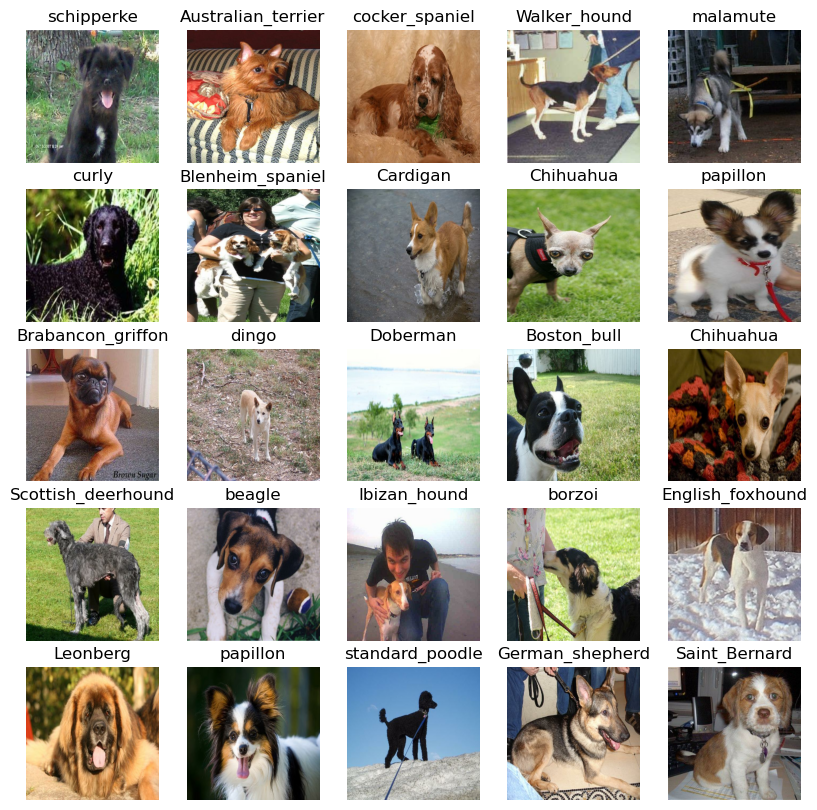

In [37]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [38]:
len(train_labels)

128

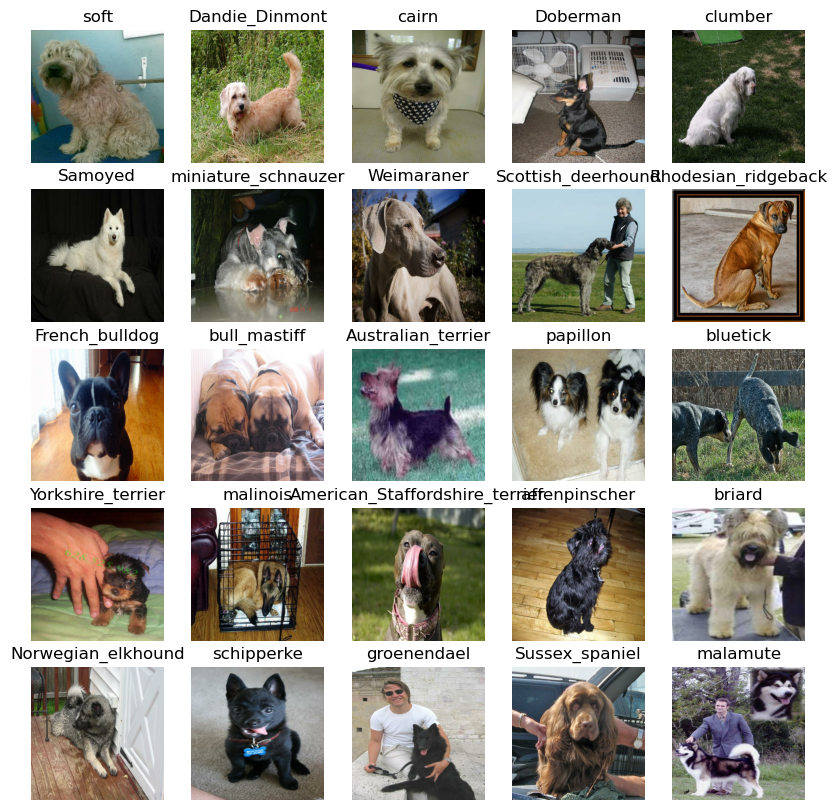

In [39]:
# now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

Building model

before we build a model, there are a few things we need to define:
- the input shape (our images shape, in the form of tensor) to our model
- the output shape (image labels, in the form of tensor) of our model
- the URL of the model we want use

now we've got ours inputs, outputs and model ready to go. let's put them together into a keras deep learning model

knowing this, let's create a function which:
- takes the input shape, output shape and the model we've chosen as parameters
- defines the layers in keras model in sequential fashion (do this first, then this, then that)
- compiles the model (say it should be evaluated and improved)
- builds the model (tells the model the input shape it'll be getting)
- returns the model

In [40]:
# setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE,3] # batch, height, width, color channels

# setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
MODEL2_URL = "https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"

INPUT_SHAPE, OUTPUT_SHAPE

([None, 299, 299, 3], 120)

In [41]:
# Create a function which builds a Keras model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers


learn_rate=.001

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", "inception")

  base_model = InceptionV3(input_shape=input_shape[1:], include_top=False, weights='imagenet')
  base_model.trainable = False


    #dsaad
    
  model = tf.keras.Sequential([
        base_model,  # InceptionV3 layers
        GlobalAveragePooling2D(),

       

        Dense(output_shape, activation='softmax')  # Output layer with softmax activation
    ])

     # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      #optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      optimizer=Adam(learning_rate=.001),  # Optimizador Adam con tasa de aprendizaje personalizada

      metrics=["accuracy"] # We'd like this to go up
  )


 

  # Build the model
  #model.build(input_shape) # Let the model know what kind of inputs it'll be getting

  return model

In [42]:
model = create_model()
model.summary()

Building model with: inception
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 120)               245880    
                                                                 
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


## creating callbacks

callbacks are helper functions a model can use during training to do such things as save it progress, check its progress or stop training early if a model stop improving

we'll create two callbacks, one for tensorboard wich helps track our models progress and another for early stopping which prevents our model from training for too long

## tensorboard callback

to setup a tensorboard callback, we need to do 3 things:

1. load the tensorboard notebook extension
2. create a tensorboard callback wich is able to save logs to a directory and pass it to our model's  fit()
3. visualize our models training logs with the %tensorboard  magic function  (we'll do this after model training)

In [43]:
# load tensorboard notebook extension
%load_ext tensorboard

In [44]:
import datetime

# create  a function to build  a tensorboard callback
def create_tensorboard_callback():
  # create a log directory for storing tensorboard logs
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

##Early stopping callback
early stopping help stop our model from overfitting by stopping training if a certain evaluation metric stop improving


In [45]:
# create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)

Training model (on subset of data)

In [46]:
NUM_EPOCH = 100 #@param {type:"slider", min:10, max:100, step:10}

let's create a function which trains a model
- create model usgin create_model()
- setup a tensorboard callback using create_tensorboard_callback
- call the fit() function on our model passing it the training data, validation data, number of epochs to train fo ( NUM_EPOCH ) and the callbacks we'd like to use
- return the model

In [47]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [48]:
# build a function to train and return trained model
def train_model():
  """
  trains a given model and return the trained version
  """
  # create a model
  model = create_model()

  # create new tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            validation_data=val_data,
            epochs=NUM_EPOCH,
            batch_size=128, 
            validation_freq=1,
            callbacks=[tensorboard, early_stopping]
           )
  # return the fitted model
  return model


In [49]:
train_data, val_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>)

In [50]:
# fit the model to the data
model = train_model()

Building model with: inception
Epoch 1/100
113/113 [==============================] - 82s 685ms/step - loss: 1.3543 - accuracy: 0.7632 - val_loss: 0.4184 - val_accuracy: 0.8933
Epoch 2/100
113/113 [==============================] - 76s 671ms/step - loss: 0.3315 - accuracy: 0.9070 - val_loss: 0.3401 - val_accuracy: 0.8989
Epoch 3/100
113/113 [==============================] - 76s 677ms/step - loss: 0.2559 - accuracy: 0.9239 - val_loss: 0.3271 - val_accuracy: 0.9009
Epoch 4/100
113/113 [==============================] - 77s 680ms/step - loss: 0.2142 - accuracy: 0.9338 - val_loss: 0.3259 - val_accuracy: 0.8928
Epoch 5/100
113/113 [==============================] - 76s 676ms/step - loss: 0.1850 - accuracy: 0.9447 - val_loss: 0.3212 - val_accuracy: 0.8971
Epoch 6/100
113/113 [==============================] - 77s 682ms/step - loss: 0.1609 - accuracy: 0.9527 - val_loss: 0.3160 - val_accuracy: 0.8976


## cheking the tensorboard logs
the tensorboard magic function (%tensorboard) will access the lod directory we created earlier and visualize its content

## making and evaluating predictions using a trained model

In [51]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 13280), started 0:12:44 ago. (Use '!kill 13280' to kill it.)

In [52]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [53]:
model.evaluate(val_data)

49/49 [==============================] - 23s 457ms/step - loss: 0.3160 - accuracy: 0.8976


[0.31597965955734253, 0.897635281085968]

In [54]:
# make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

49/49 [==============================] - 23s 456ms/step


array([[3.2375774e-05, 1.2854446e-05, 4.3243173e-05, ..., 7.3937910e-05,
        9.2349903e-05, 1.8541530e-05],
       [2.7872153e-08, 1.0998770e-07, 6.2743477e-09, ..., 5.2653934e-07,
        1.9706920e-07, 2.6364862e-06],
       [2.0123085e-07, 3.7993639e-06, 2.3390044e-07, ..., 3.5251196e-06,
        1.8481882e-06, 4.0214259e-06],
       ...,
       [9.9967015e-01, 4.5819644e-07, 6.9381974e-07, ..., 2.5403972e-07,
        1.5514721e-06, 7.8981536e-08],
       [1.8107132e-05, 9.5120922e-05, 1.9978055e-05, ..., 1.5977649e-04,
        2.1969819e-05, 2.0348436e-05],
       [8.9330206e-06, 2.4175954e-05, 5.7183584e-06, ..., 2.7344105e-04,
        6.7498651e-04, 9.0067233e-06]], dtype=float32)

In [55]:
np.sum(predictions[0])

1.0000001

In [56]:
# first prediction
index = 0
print(predictions[index])
print(f"max value (probability of prediction): {np.max(predictions[index])}")
print(f"sum: {np.sum(predictions[index])}")
print(f"max index: {np.argmax(predictions[index])}")
print(f"predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[3.23757740e-05 1.28544461e-05 4.32431734e-05 5.44130808e-06
 2.03116761e-05 2.15721502e-06 3.45146213e-06 5.45239755e-06
 1.10254950e-06 1.29231512e-06 1.27540960e-04 8.02039176e-06
 1.67504803e-03 7.45748985e-04 5.78753315e-06 2.33873725e-05
 9.20325183e-05 2.66230672e-05 1.04589574e-03 4.38888037e-06
 5.34880655e-06 6.73186369e-05 2.02661840e-06 7.03194519e-06
 1.26504729e-05 1.45682980e-05 2.26231555e-06 6.51270830e-06
 4.74983681e-05 2.61258156e-05 2.24101022e-05 1.58104158e-05
 1.61542596e-06 2.30790956e-05 4.09450568e-03 5.51608573e-05
 1.21926481e-03 1.36163417e-05 6.44181227e-06 1.21265526e-04
 1.53585443e-05 5.20144968e-05 6.30774157e-05 3.26187983e-05
 1.25702318e-05 9.02818283e-06 1.12595062e-05 1.50468768e-04
 3.24454913e-06 1.30500466e-05 2.22486502e-04 6.77495336e-06
 7.04361264e-06 8.12726000e-07 4.91941755e-05 1.23085892e-05
 6.53391498e-06 3.73976945e-06 7.55134579e-06 3.44120781e-05
 2.04693904e-04 2.19553112e-04 1.84466007e-05 2.79004144e-05
 1.99871265e-05 5.284066

In [57]:
# turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  turns and array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# get  a predicted label based  on an array of prediction probabilities
#pred_label = get_pred_label(predictions[81])
#pred_label

now since our validation data is still in a batch dataset, we'll have to unbatchfy it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels)

In [58]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [59]:
images_ = []
labels_ = []

# loop throught unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)
images_[0], labels_[0]

(array([[[0.47084403, 0.5963342 , 0.54535383],
         [0.48346782, 0.608958  , 0.5579776 ],
         [0.49208006, 0.6175702 , 0.56658983],
         ...,
         [0.95222265, 0.987261  , 0.9755815 ],
         [0.9532955 , 0.9883339 , 0.97665447],
         [0.9608696 , 0.99590796, 0.98422855]],
 
        [[0.48260874, 0.6080989 , 0.55711854],
         [0.49539718, 0.62088734, 0.56990695],
         [0.50565946, 0.63114965, 0.58016926],
         ...,
         [0.9546276 , 0.977134  , 0.9695466 ],
         [0.95892215, 0.9814285 , 0.97384113],
         [0.9664962 , 0.9890026 , 0.9814152 ]],
 
        [[0.48627454, 0.6117647 , 0.56078434],
         [0.50114864, 0.6266388 , 0.57565844],
         [0.51273805, 0.63822824, 0.58724785],
         ...,
         [0.9805038 , 0.9869883 , 0.98374605],
         [0.9859842 , 0.9924259 , 0.98920506],
         [0.99300945, 1.        , 0.9965047 ]],
 
        ...,
 
        [[0.07715251, 0.24970154, 0.29283878],
         [0.07237745, 0.24492648, 0.28806

In [60]:
# create  a function to unbatch a batch dataset
def unbatchify(data):
    """
    takes a batched dataset of (image, label) tensor and return separate arrays of images and labels
    """
    
    images =[]
    labels=[]
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
        
    return images, labels
# unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.47084403, 0.5963342 , 0.54535383],
         [0.48346782, 0.608958  , 0.5579776 ],
         [0.49208006, 0.6175702 , 0.56658983],
         ...,
         [0.95222265, 0.987261  , 0.9755815 ],
         [0.9532955 , 0.9883339 , 0.97665447],
         [0.9608696 , 0.99590796, 0.98422855]],
 
        [[0.48260874, 0.6080989 , 0.55711854],
         [0.49539718, 0.62088734, 0.56990695],
         [0.50565946, 0.63114965, 0.58016926],
         ...,
         [0.9546276 , 0.977134  , 0.9695466 ],
         [0.95892215, 0.9814285 , 0.97384113],
         [0.9664962 , 0.9890026 , 0.9814152 ]],
 
        [[0.48627454, 0.6117647 , 0.56078434],
         [0.50114864, 0.6266388 , 0.57565844],
         [0.51273805, 0.63822824, 0.58724785],
         ...,
         [0.9805038 , 0.9869883 , 0.98374605],
         [0.9859842 , 0.9924259 , 0.98920506],
         [0.99300945, 1.        , 0.9965047 ]],
 
        ...,
 
        [[0.07715251, 0.24970154, 0.29283878],
         [0.07237745, 0.24492648, 0.28806

now we've got ways to get:
- prediction labels
- validation labels
- validation images


In [61]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    view the prediction, ground truth and image for sample n
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    
    # get te pred label
    pred_label = get_pred_label(pred_prob)

    # plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # change the colour of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color="green"
    else:
        color="red"

    # change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                     true_label),
                                    color=color)
    
    

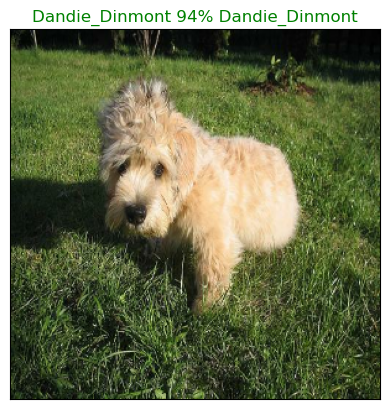

In [62]:
plot_pred( prediction_probabilities=predictions,
         labels=val_labels,
         images=val_images,
         n=56)

In [63]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    plus the top 10 highest prediction confidences along with the truth label for sample n
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # get the predicted label
    pred_label = get_pred_label(pred_prob)

    # find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

    # find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # find the top 10 prediction confidence labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]


    # setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                      top_10_pred_values,
                      color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)), labels=top_10_pred_labels, rotation="vertical")

    # change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

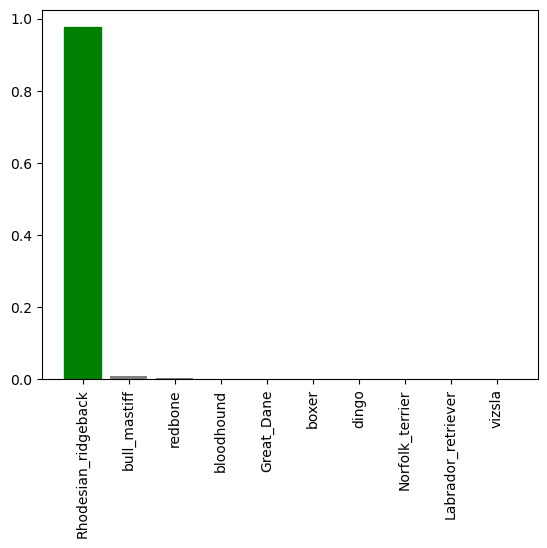

In [64]:
plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=9)

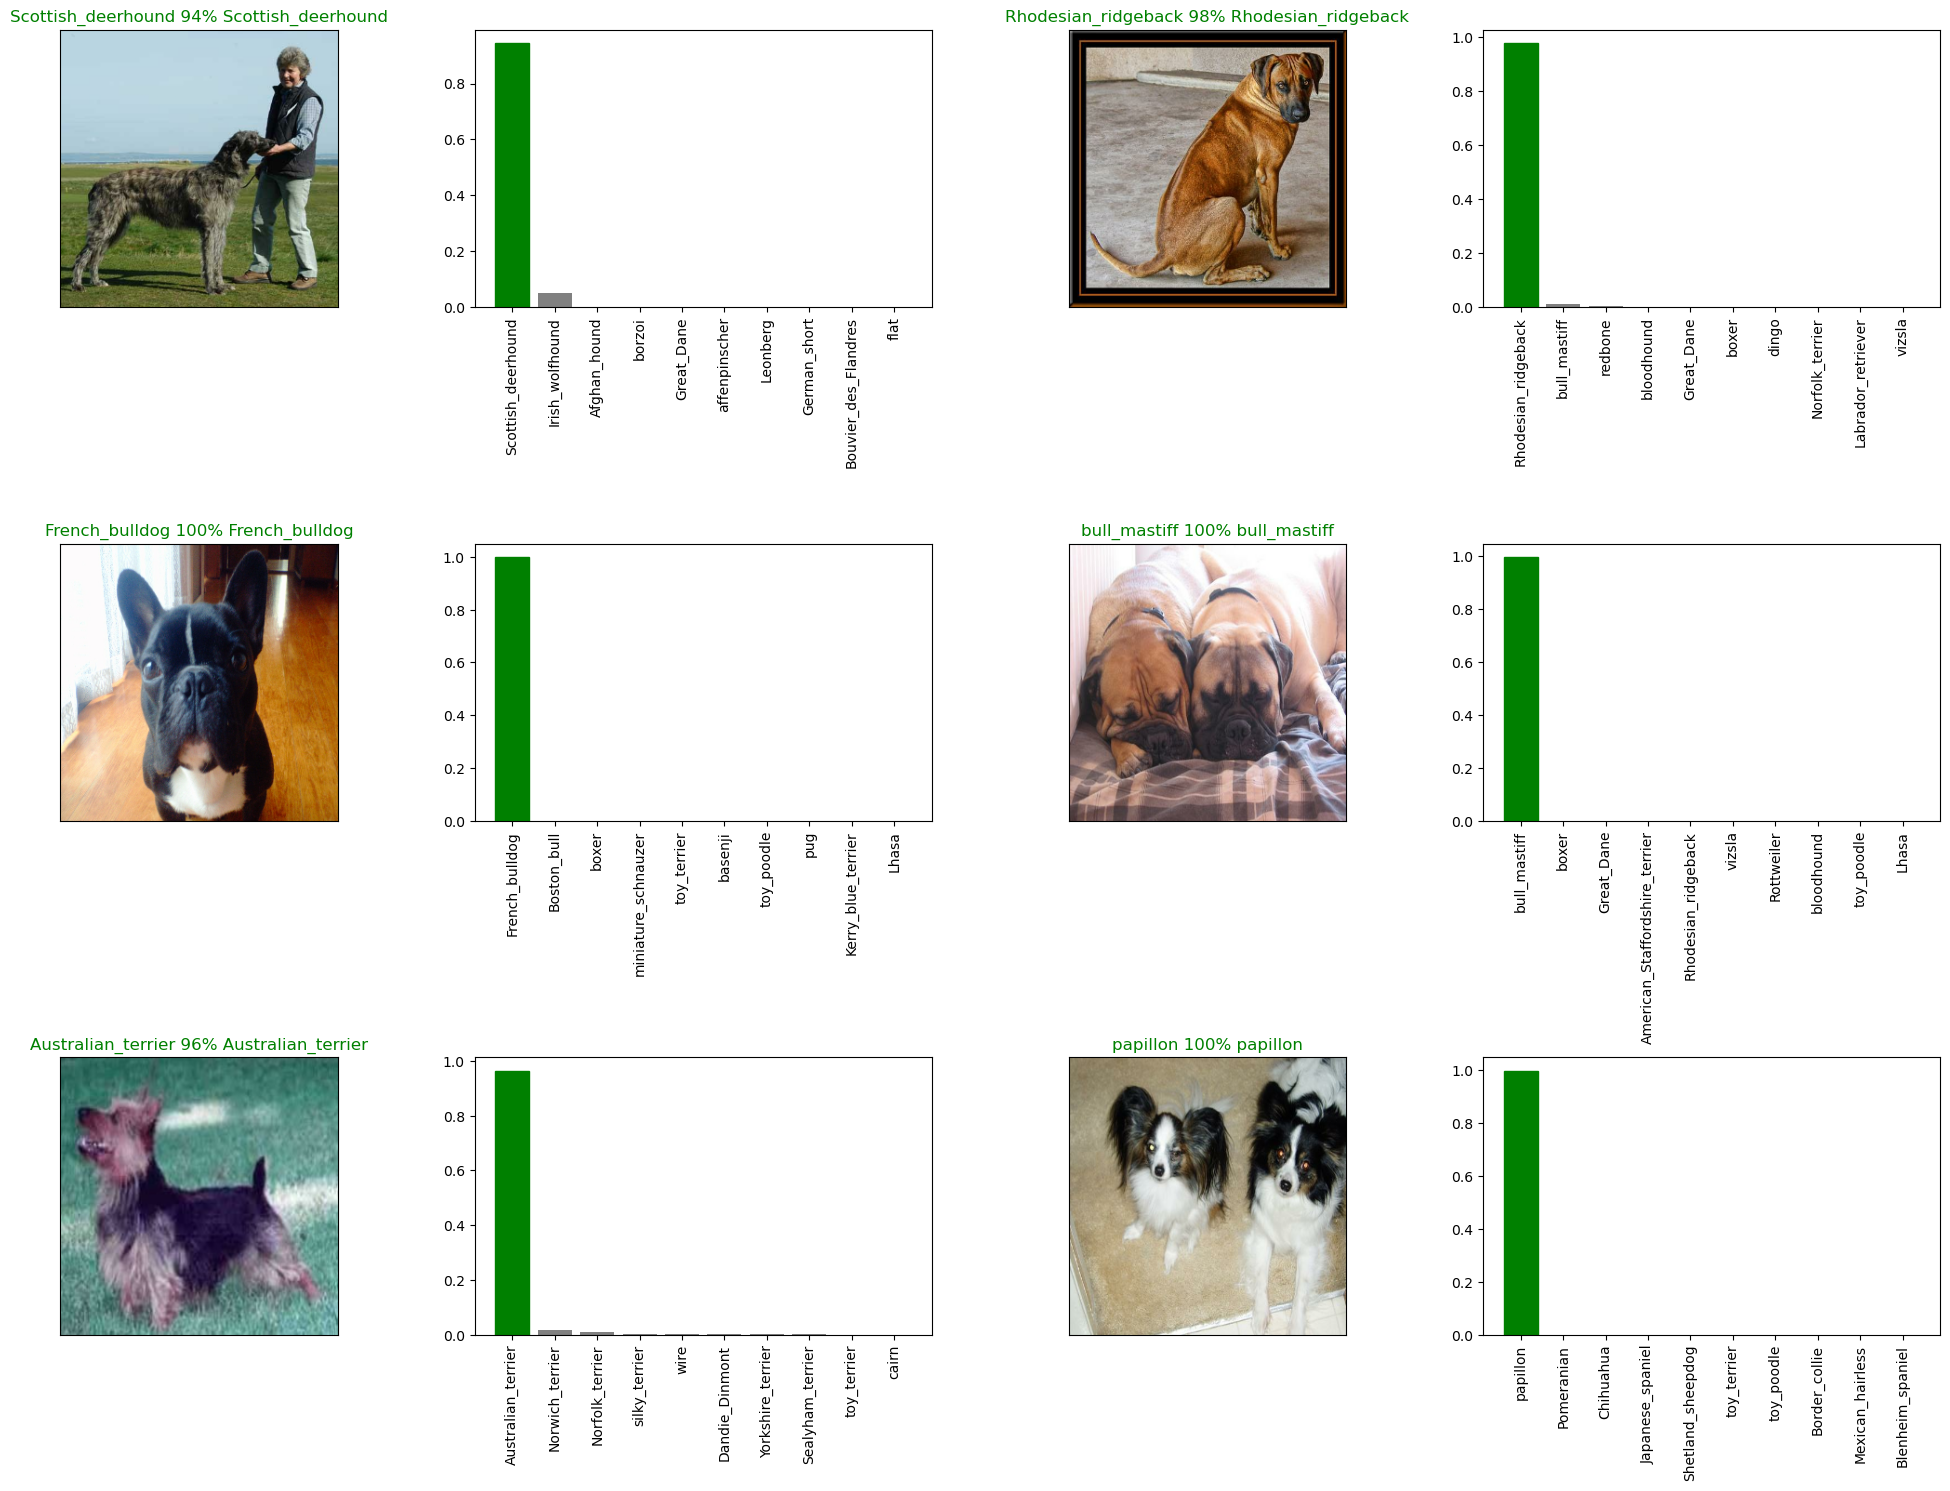

In [65]:
# Let's check a few predictions and their different values
i_multiplier = 8
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [67]:
# create a function to save a model
def save_model(model, suffix=None):
    """
    save a given model in models directory and appends a suffix (string)
    """
    # create a model directory pathname with current time
    modeldir = os.path.join("models", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path = modeldir + "-" + suffix + ".h5" # save format of model
    print(f"saving model to: {model_path}")
    model.save(model_path)
    return model_path
    

In [68]:
# save our model 
save_model(model, suffix="modelo")

saving model to: models\20240227-124339-modelo.h5


'models\\20240227-124339-modelo.h5'